In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

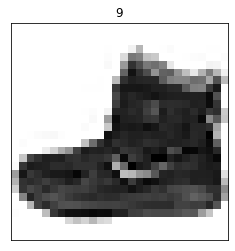

In [8]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

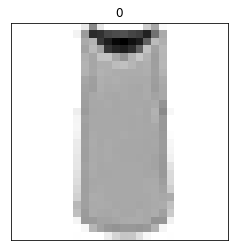

In [9]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(train_labels[2])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
class_names[train_labels[0]]

'Ankle boot'

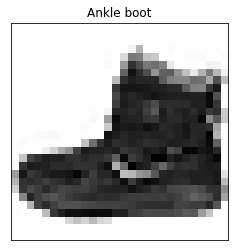

In [13]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(class_names[train_labels[0]])
plt.xticks([])
plt.yticks([])
plt.show()

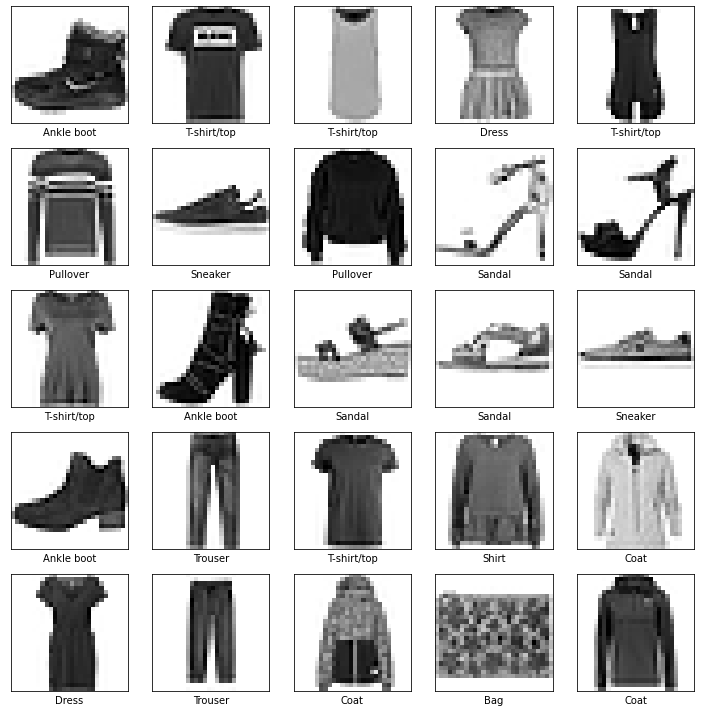

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout() 
plt.show()

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [16]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels,validation_split=0.2,epochs=50)

Epoch 1/50
1500/1500 [==============================] - 5s 2ms/step - loss: 0.4965 - accuracy: 0.8229 - val_loss: 0.4089 - val_accuracy: 0.8560
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3674 - accuracy: 0.8646 - val_loss: 0.3915 - val_accuracy: 0.8564
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.8773 - val_loss: 0.3844 - val_accuracy: 0.8560
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3067 - accuracy: 0.8865 - val_loss: 0.3360 - val_accuracy: 0.8773
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2851 - accuracy: 0.8936 - val_loss: 0.3311 - val_accuracy: 0.8778
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2709 - accuracy: 0.8986 - val_loss: 0.3172 - val_accuracy: 0.8882
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9048 - val_loss: 0.3393 - val_accuracy:

In [21]:
history.history

{'loss': [0.49648869037628174,
  0.36744120717048645,
  0.3306161165237427,
  0.3066977262496948,
  0.2850828170776367,
  0.2709102928638458,
  0.256112277507782,
  0.2437756359577179,
  0.233429953455925,
  0.22465738654136658,
  0.21671338379383087,
  0.2064749002456665,
  0.1979464888572693,
  0.1921008974313736,
  0.18475791811943054,
  0.17948248982429504,
  0.17134690284729004,
  0.1653282642364502,
  0.15923775732517242,
  0.15514124929904938,
  0.15168970823287964,
  0.146294504404068,
  0.14324802160263062,
  0.1375236064195633,
  0.13262662291526794,
  0.12620455026626587,
  0.1258924901485443,
  0.12633493542671204,
  0.11632426828145981,
  0.1170964390039444,
  0.11122866719961166,
  0.11253304779529572,
  0.10422175377607346,
  0.10751493275165558,
  0.10533322393894196,
  0.09794086962938309,
  0.0968017503619194,
  0.09557732939720154,
  0.09491994976997375,
  0.09081628173589706,
  0.08468601852655411,
  0.08654370158910751,
  0.08715088665485382,
  0.08495941013097763,

In [22]:
history.history['accuracy']

[0.8228750228881836,
 0.8645833134651184,
 0.8772916793823242,
 0.8864791393280029,
 0.8936458230018616,
 0.8986250162124634,
 0.9047708511352539,
 0.9068750143051147,
 0.9122916460037231,
 0.9149791598320007,
 0.9183958172798157,
 0.9222708344459534,
 0.9256458282470703,
 0.9281250238418579,
 0.930020809173584,
 0.9315208196640015,
 0.9352916479110718,
 0.93770831823349,
 0.940541684627533,
 0.9418958425521851,
 0.9439166784286499,
 0.9450416564941406,
 0.9461666941642761,
 0.9486874938011169,
 0.9495000243186951,
 0.9524999856948853,
 0.9523541927337646,
 0.9523958563804626,
 0.9561874866485596,
 0.9554583430290222,
 0.9586458206176758,
 0.957854151725769,
 0.9603541493415833,
 0.9591041803359985,
 0.9599791765213013,
 0.9626250267028809,
 0.9633749723434448,
 0.9636666774749756,
 0.964145839214325,
 0.9662083387374878,
 0.9681458473205566,
 0.9688125252723694,
 0.9677500128746033,
 0.9682708382606506,
 0.9695624709129333,
 0.9709374904632568,
 0.9714375138282776,
 0.9721458554267883

In [23]:
history.history['val_accuracy']

[0.8560000061988831,
 0.856416642665863,
 0.8560000061988831,
 0.8772500157356262,
 0.8778333067893982,
 0.8882499933242798,
 0.8799999952316284,
 0.887499988079071,
 0.8924999833106995,
 0.887416660785675,
 0.8913333415985107,
 0.8956666588783264,
 0.8891666531562805,
 0.8890833258628845,
 0.8897500038146973,
 0.8944166898727417,
 0.8886666893959045,
 0.8864166736602783,
 0.8945000171661377,
 0.893833339214325,
 0.8885833621025085,
 0.8940833210945129,
 0.8948333263397217,
 0.8900833129882812,
 0.8899999856948853,
 0.8871666789054871,
 0.8941666483879089,
 0.8894166946411133,
 0.8893333077430725,
 0.8958333134651184,
 0.8891666531562805,
 0.8949999809265137,
 0.8963333368301392,
 0.8934999704360962,
 0.8915833234786987,
 0.8919166922569275,
 0.8981666564941406,
 0.8952500224113464,
 0.8915833234786987,
 0.8962500095367432,
 0.8885833621025085,
 0.8973333239555359,
 0.8940833210945129,
 0.8977500200271606,
 0.8948333263397217,
 0.8914166688919067,
 0.8944166898727417,
 0.89275002479553

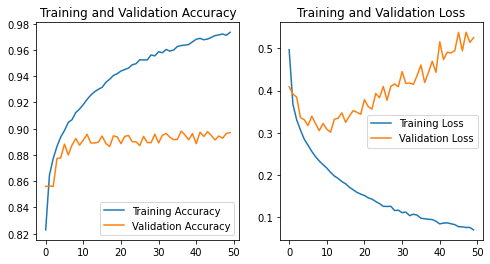

In [24]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [25]:
# Overfitted

In [26]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [27]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_new.compile(optimizer='adam',
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [33]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [34]:
history = model_new.fit(train_images,train_labels,epochs=50,validation_split=0.2,callbacks=callback)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9347 - val_loss: 0.3474 - val_accuracy: 0.8888
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1653 - accuracy: 0.9382 - val_loss: 0.3518 - val_accuracy: 0.8879
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1627 - accuracy: 0.9391 - val_loss: 0.3455 - val_accuracy: 0.8952
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1556 - accuracy: 0.9419 - val_loss: 0.3634 - val_accuracy: 0.8881
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1518 - accuracy: 0.9434 - val_loss: 0.3657 - val_accuracy: 0.8936
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1487 - accuracy: 0.9448 - val_loss: 0.3576 - val_accuracy: 0.8919


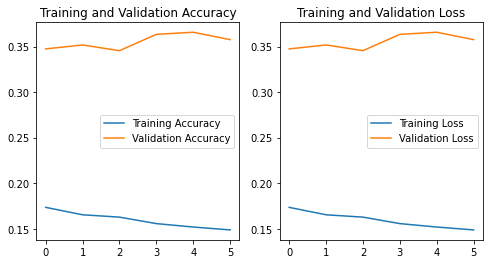

In [35]:
epochs = 6
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,loss,label='Training Accuracy')
plt.plot(epochs_range,val_loss,label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()
